In [1]:
# Imports
from ML import myPCA 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
Part 1. Exercise

Elimine las columnas que considere que no son relevantes para su análisis y utilice documentación interna para justificar su razonamiento. 
Luego con las columnas restantes elimine cualquier entrada que posea datos faltantes.
Utilice one-hot encoding para convertir las variables categóricas en variables numéricas.
'''
def chargeData():
    return pd.read_csv('titanic.csv',delimiter=",",decimal=".")

def inspectData(df):
    print("Tamaño de datos:\n",df.shape)
    print("Tipos de Columnas:\n",df.dtypes)
    NaNColumns = df.columns[df.isna().any()]
    print("Columnas con NA:\n",NaNColumns)
    print("Cantidad de NA por columna:\n",df[NaNColumns].isnull().sum(axis = 0))

def deleteData(df):
    '''
    Columns erased:
    1. PassengerId: Is is just data to recognize a passenger and not make any effect in the survival
    2. Name: Is is just data to recognize a passenger and not make any effect in the survival
    3. Ticket: Is is just data to recognize a passenger and not make any effect in the survival
    3. Cabin: Have values with more than a 75% of data with NaN
    '''
    df.drop(columns = ["PassengerId" ,"Name","Cabin","Ticket"],inplace=True)
    before = df.shape
    '''
    Erase NA rows
    '''
    df.dropna(inplace= True)
    print("Se borran en total",(before[0]-df.shape[0]),"registros")
    
    return df


def getData():
    # Upload and first check
    # Implemente un método que cargue el set de datos a memoria (puede utilizar la biblioteca pandas para esto).
    df = chargeData()
    inspectData(df)
    df = deleteData(df)
    # Se crea el one-hot encoding
    
    categoricalColumns = ['Survived','Pclass','Sex','Embarked']
    df = pd.get_dummies(df,columns=categoricalColumns)
    return df

df = getData()

    


Tamaño de datos:
 (1309, 12)
Tipos de Columnas:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columnas con NA:
 Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Cantidad de NA por columna:
 Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64
Se borran en total 266 registros


In [3]:
'''
Part 2. Conversion dataframe to numpy2D
'''
matrixArray = df.to_numpy()

In [4]:

'''
Part 3.
Class myPCA
'''
my_pca = myPCA(matrixArray)
#print(a.eigVal)
print(np.round(my_pca.inertia,3))
print(np.round(my_pca.eigVec[0],5))
print(my_pca.matrixArray.shape)

[0.278 0.174 0.129 0.106 0.085 0.071 0.051 0.042 0.037 0.027 0.    0.
 0.    0.   ]
[-0.04579  0.33526  0.27138 -0.10747  0.26573 -0.36762 -0.5068  -0.20369
 -0.45756 -0.29473 -0.      -0.       0.      -0.     ]
(1043, 14)


In [5]:
# numericColumns = ['Age','SibSp','Parch','Fare']
# categoricalColumns = ['Survived','Pclass','Sex','Embarked']
# numericos = df.loc[:,numericColumns]
# categoricos = df.loc[:,categoricalColumns]
# print("Descripcion:\n",numericos.describe())

# for column in categoricos.columns:
# 	datos = categoricos.loc[:,column]
# 	categorias = datos.unique()
# 	mapeo = {}
# 	for i in range(len(categorias)):
# 		mapeo[categorias[i]] = i
# 	plt.hist(datos.map(mapeo),bins=len(categorias))
# 	plt.title("Distribucion de los datos de "+column)
# 	plt.xlabel("Tipo")
# 	plt.ylabel("Cantidad")
# 	plt.xticks(range(len(categorias)),categorias)
# 	plt.show()


# plt.hist(numericos['SibSp'],bins=30)
# plt.show()
# plt.hist(numericos['Parch'],bins=30)
# plt.show

In [6]:
import seaborn as sns
# Nos permite hacer el ploteo en todas las columnas
# sns.pairplot(df, hue = 'Survived')

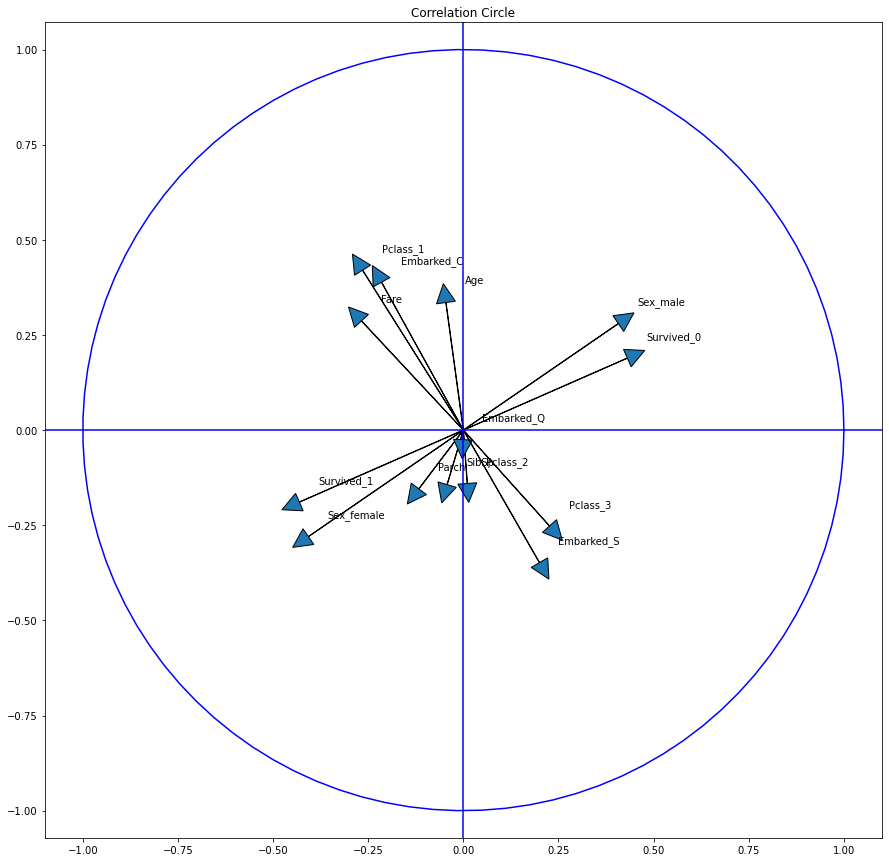

In [7]:
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, my_pca.C.shape[1]):
    plt.arrow(0,0, my_pca.eigVec[i, 0], # x - PC1
        my_pca.eigVec[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(my_pca.eigVec[i, 0] + 0.05, my_pca.eigVec[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()

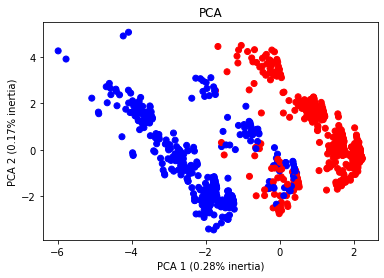

In [8]:
import matplotlib.pyplot as plt
plt.scatter(np.ravel(my_pca.C[:,0]),np.ravel(my_pca.C[:,1]),c = ['b' if i==1 else 'r' for i in df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (my_pca.inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (my_pca.inertia[1],))
plt.title('PCA')
plt.show()

In [9]:
df

,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,1,1,13.7750,0,1,0,0,1,1,0,0,0,1
1302,37.0,1,0,90.0000,0,1,1,0,0,1,0,0,1,0
1303,28.0,0,0,7.7750,0,1,0,0,1,1,0,0,0,1
1305,39.0,0,0,108.9000,0,1,1,0,0,1,0,1,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
C = pca.fit_transform(df_scaled)

In [12]:
import numpy as np
inertia = pca.explained_variance_ratio_
V = pca.transform(np.identity(df_scaled.shape[1]))

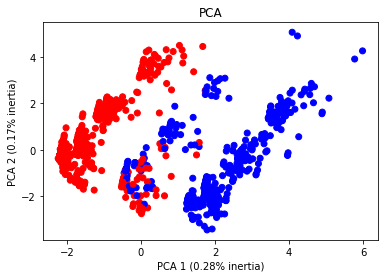

In [13]:
import matplotlib.pyplot as plt
plt.scatter(np.ravel(C[:,0]),np.ravel(C[:,1]),c = ['b' if i==1 else 'r' for i in df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[1],))
plt.title('PCA')
plt.show()

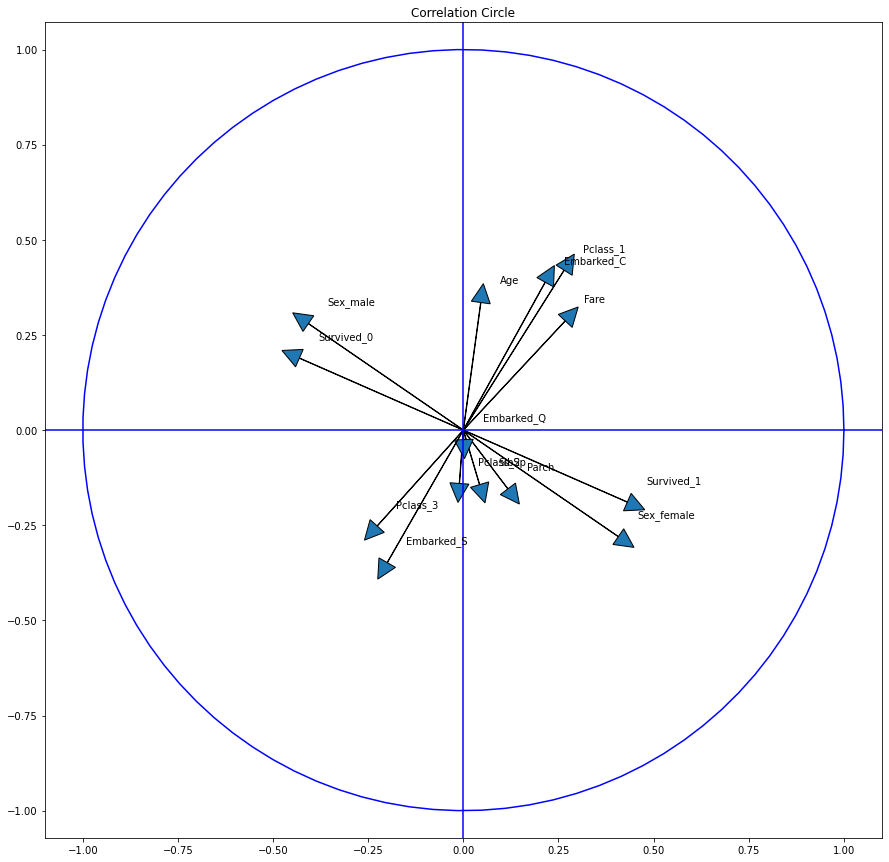

In [14]:
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, V[i, 0], # x - PC1
        V[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()